Import the data and functions I'll need

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma, brewer
from bokeh.transform import factor_cmap
from bokeh.models import Legend, HoverTool

In [3]:
df = pd.read_csv("Data1-workouts.csv")

Clean the data

In [4]:
df = df.drop(["Unnamed: 0"], axis=1)

In [5]:
df.columns = ['ActivityType', 'Duration', 'DurationUnit',
       'TotalDistance', 'TotalDistanceUnit', 'TotalEnergyBurned',
       'TotalEnergyBurnedUnit', 'SourceName', 'SourceVersion', 'Device',
       'CreationDate', 'StartDate', 'EndDate', 'MetadataEntry',
       'WorkoutEvent', 'WorkoutRoute']

In [6]:
df['ActivityType'] = df['ActivityType'].str.split('Type', expand=True)[1]

In [7]:
df = df.replace('HighIntensityIntervalTraining','HIIT')
df = df.replace('FunctionalStrengthTraining','StrengthTraining')

In [8]:
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

In [9]:
df.head()

,ActivityType,Duration,DurationUnit,TotalDistance,TotalDistanceUnit,TotalEnergyBurned,TotalEnergyBurnedUnit,SourceName,SourceVersion,Device,CreationDate,StartDate,EndDate,MetadataEntry,WorkoutEvent,WorkoutRoute
0,Yoga,33.984384,min,0.000000,mi,109.529941,Cal,Laurenâ€™s AppleÂ Watch,6.2,"<<HKDevice: 0x280dd9c20>, name:Apple Watch, ma...",2020-05-05 09:04:15-05:00,2020-05-05 08:30:14-05:00,2020-05-05 09:04:13-05:00,"[OrderedDict([('@key', 'HKIndoorWorkout'), ('@...",NaN,NaN
1,Walking,93.264205,min,5.463501,mi,467.828073,Cal,Laurenâ€™s AppleÂ Watch,6.2.1,"<<HKDevice: 0x280ddab20>, name:Apple Watch, ma...",2020-05-07 17:21:20-05:00,2020-05-07 15:47:49-05:00,2020-05-07 17:21:08-05:00,"[OrderedDict([('@key', 'HKIndoorWorkout'), ('@...","[OrderedDict([('@type', 'HKWorkoutEventTypeSeg...","OrderedDict([('@sourceName', 'Laurenâ€™s Apple..."
2,Walking,41.803265,min,1.734685,mi,131.107519,Cal,Laurenâ€™s AppleÂ Watch,6.2.1,"<<HKDevice: 0x280ddab20>, name:Apple Watch, ma...",2020-05-09 15:14:57-05:00,2020-05-09 14:20:27-05:00,2020-05-09 15:14:52-05:00,"[OrderedDict([('@key', 'HKIndoorWorkout'), ('@...","[OrderedDict([('@type', 'HKWorkoutEventTypeSeg...","OrderedDict([('@sourceName', 'Laurenâ€™s Apple..."
3,Yoga,28.382395,min,0.000000,mi,104.065670,Cal,Laurenâ€™s AppleÂ Watch,6.2.1,"<<HKDevice: 0x280ddab20>, name:Apple Watch, ma...",2020-05-12 13:37:24-05:00,2020-05-12 13:08:58-05:00,2020-05-12 13:37:21-05:00,"[OrderedDict([('@key', 'HKIndoorWorkout'), ('@...",NaN,NaN
4,Walking,67.775918,min,3.875547,mi,308.604110,Cal,Laurenâ€™s AppleÂ Watch,6.2.1,"<<HKDevice: 0x280ddab20>, name:Apple Watch, ma...",2020-05-12 15:30:49-05:00,2020-05-12 14:22:50-05:00,2020-05-12 15:30:39-05:00,"[OrderedDict([('@key', 'HKIndoorWorkout'), ('@...","[OrderedDict([('@type', 'HKWorkoutEventTypeSeg...","OrderedDict([('@sourceName', 'Laurenâ€™s Apple..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype                                 
---  ------                 --------------  -----                                 
 0   ActivityType           221 non-null    object                                
 1   Duration               221 non-null    float64                               
 2   DurationUnit           221 non-null    object                                
 3   TotalDistance          221 non-null    float64                               
 4   TotalDistanceUnit      221 non-null    object                                
 5   TotalEnergyBurned      221 non-null    float64                               
 6   TotalEnergyBurnedUnit  221 non-null    object                                
 7   SourceName             221 non-null    object                                
 8   SourceVersion          221 non-null    object               

Visualization

Let's start with a scatter plot in matplotlib

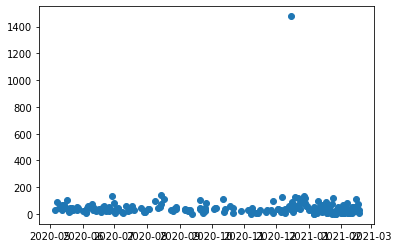

In [52]:
plt.scatter(df['StartDate'], df['Duration'], s=None, c=None, cmap=None)

Weird, Apple thinks I went on a 24 hour run.. let's drop that outlier for the sake of visualization (it was definitely a bug) 

In [18]:
df = df[~(df['Duration'] == df['Duration'].max())]

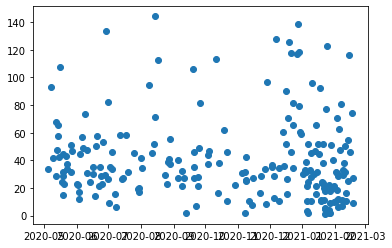

In [19]:
plt.scatter(df['StartDate'], df['Duration'], s=None, c=None, cmap=None)

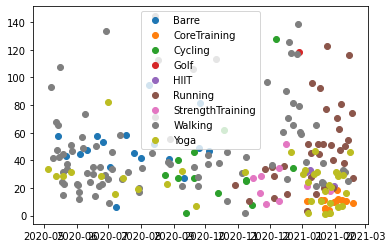

In [20]:
groups = df.groupby('ActivityType')
for name, group in groups:
    plt.plot(group['StartDate'], group['Duration'], marker='.', linestyle='', markersize=12, label=name)
plt.legend()

Hmm matplotlib isn't exactly what we want, let's try bokeh

In [21]:
output_file("Data1-Fitness.html")

In [22]:
graph = figure(title="Fitness Data Visualization", plot_width=800, plot_height=300, x_axis_type='datetime')

In [23]:
graph.xaxis.axis_label = 'Date'
graph.yaxis.axis_label = 'Duration (min)'

In [24]:
activities = df['ActivityType'].unique()
colors = brewer['Set1'][len(activities)]
colormap = {activities[i]: colors[i] for i in range(len(activities))}
color_list = [colormap[x] for x in df['ActivityType']]

In [25]:
legend_it = []

for activity in activities:
    lil_df = df[df['ActivityType'] == activity]
    c = graph.scatter(x='StartDate', y='Duration', source=lil_df, color=colormap[activity], alpha=0.8,
           muted_color=colormap[activity], muted_alpha=0.2, size=7)
    legend_it.append((activity, [c]))


legend = Legend(items=legend_it)
legend.click_policy="mute"

graph.add_layout(legend, 'right')

In [26]:
hover = HoverTool(
    tooltips = [
        ("Calories Burned", '@TotalEnergyBurned{0.0}'),
    ], 
)
graph.add_tools(hover)

In [27]:
show(graph)